In [13]:
pip install emoji tensorflow numpy pandas keras

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\venka\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\venka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install emoji==1.7 matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 6.5 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 6.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.7 MB/s eta 0:00:00
U


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\venka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('train_emoji.csv',header=None)
test = pd.read_csv('test_emoji (1).csv',header=None)

In [5]:
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [6]:
import emoji as emoji

In [7]:
#emoji.EMOJI_ALIAS_UNICODE

In [8]:
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:",
                    
                   }

In [9]:
emoji.emojize(":fork_and_knife:")

'🍴'

In [10]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [11]:
data = train.values
for i in range(10):
    print(data[i][0],emoji.emojize(emoji_dictionary[str(data[i][1])]))

never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾


In [14]:
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
XT = train[0]
Xt = test[0]

YT = to_categorical(train[1])
Yt = to_categorical(test[1])


print(XT.shape)
print(Xt.shape)
print(YT.shape)
print(Yt.shape)

(132,)
(56,)
(132, 5)
(56, 5)


In [ ]:
embeddings = {}
with open('glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')
        embeddings[word] = coeffs

In [ ]:
def getOutputEmbeddings(X):
    
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings[X[ix][jx].lower()]
            
    return embedding_matrix_output

In [ ]:
XT[1]

'I am proud of your achievements'

In [ ]:
emb_XT = getOutputEmbeddings(XT)
emb_Xt = getOutputEmbeddings(Xt)

C:\Users\venka\AppData\Local\Temp\ipykernel_13652\2176504226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ix] = X[ix].split()


In [ ]:
print(emb_XT.shape)
print(emb_Xt.shape)


(132, 10, 50)
(56, 10, 50)


In [ ]:
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

c:\Users\venka\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,789 (245.27 KB)

 Trainable params: 62,789 (245.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.utils import to_categorical

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.fit(emb_XT,YT,batch_size=32,epochs=40,shuffle=True,validation_split=0.1)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - acc: 0.2494 - loss: 1.6052 - val_acc: 0.1429 - val_loss: 1.6054
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.3398 - loss: 1.5446 - val_acc: 0.0714 - val_loss: 1.6235
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3697 - loss: 1.5019 - val_acc: 0.0714 - val_loss: 1.6295
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4005 - loss: 1.4329 - val_acc: 0.2857 - val_loss: 1.6273
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4591 - loss: 1.4050 - val_acc: 0.3571 - val_loss: 1.5727
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.4200 - loss: 1.3655 - val_acc: 0.3571 - val_loss: 1.4785
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5375 - loss: 1.2796 - val_acc: 0.2857 - val_loss: 1.4127
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.6079 - loss: 1.1618 - val_acc: 0.3571 - val_loss: 1.3465
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6563 - loss: 1.0443 -

In [ ]:
model.evaluate(emb_Xt,Yt)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6265 - loss: 1.7572 


[1.5476150512695312, 0.6428571343421936]

In [ ]:
pred = np.argmax(model.predict(emb_Xt), axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step


In [ ]:
for i in range(30):
    print(' '.join(Xt[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Yt[i]))]))
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

s
🍴
😓
he did not answer
😓
😓
he got a raise
😁
😁
she got me a present
❤️
❤️
ha ha ha it was so funny
😁
😁
he is a good friend
❤️
😁
I am upset
❤️
😓
We had such a lovely dinner tonight
❤️
😁
where is the food
🍴
🍴
Stop making this joke ha ha ha
😁
😁
where is the ball
⚾
⚾
work is hard
😓
😁
This girl is messing with me
😓
❤️
are you serious ha ha
😁
😓
Let us go play baseball
⚾
⚾
This stupid grader is not working
😓
😓
work is horrible
😓
😁
Congratulation for having a baby
😁
😁
stop messing around
😓
😓
any suggestions for dinner
🍴
😁
I love taking breaks
❤️
❤️
you brighten my day
😁
😁
I boiled rice
🍴
🍴
she is a bully
😓
❤️
Why are you feeling bad
😓
😓
I am upset
😓
😓
I worked during my birthday
😓
😁
My grandmother is the love of my life
❤️
❤️
enjoy your break
😁
⚾
valentine day is near
❤️
😁


In [ ]:
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("model.weights.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
with open("model.json", "r") as file:
    model = model_from_json(file.read())
model.load_weights("model.h5")

In [ ]:
test_str = "Hello how are you"
X = pd.Series([test_str])

In [ ]:
emb_X = getOutputEmbeddings(X)

In [ ]:
# Get the predicted probabilities
predictions = model.predict(emb_X)

# Convert probabilities to class labels
p = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


In [ ]:
print(' '.join(X[0]))
print(emoji.emojize(emoji_dictionary[str(p[0])]))

Hello how are you
😁


In [ ]:
# Function to predict emoji for user input
def predict_emoji(input_str):
    X = pd.Series([input_str])
    emb_X = getOutputEmbeddings(X)
    predictions = model.predict(emb_X)
    p = np.argmax(predictions, axis=1)
    print('Input:', input_str)
    print('Predicted Emoji:', emoji.emojize(emoji_dictionary[str(p[0])]))

# Predefined input strings
inputs = [
    "I am playing ",
    "I am so happy today",
    "I am feeling sad", "i love you",
    "I AM EATING","I am excited"

]

# Predict emoji for each input
for input_str in inputs:
    predict_emoji(input_str)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Input: I am playing 
Predicted Emoji: ❤️
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: I am so happy today
Predicted Emoji: 😁
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Input: I am feeling sad
Predicted Emoji: 😓
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Input: i love you
Predicted Emoji: 😁
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Input: I AM EATING
Predicted Emoji: 🍴
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Input: I am excited
Predicted Emoji: 😁


❤️
⚾
😁
😓
🍴
never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾
(132,)
(56,)
(132, 5)
(56, 5)
(132, 10, 50)
(56, 10, 50)


C:\Users\venka\AppData\Local\Temp\ipykernel_13652\865422073.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ix] = X[ix].split()
c:\Users\venka\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,789 (245.27 KB)

 Trainable params: 62,789 (245.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - acc: 0.1978 - loss: 1.6211 - val_acc: 0.2143 - val_loss: 1.6098
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.2843 - loss: 1.5436 - val_acc: 0.2143 - val_loss: 1.6223
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.3528 - loss: 1.5108 - val_acc: 0.1429 - val_loss: 1.6491
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.3872 - loss: 1.4764 - val_acc: 0.1429 - val_loss: 1.6321
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.3705 - loss: 1.4455 - val_acc: 0.1429 - val_loss: 1.5671
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4729 - loss: 1.3723 - val_acc: 0.4286 - val_loss: 1.4942
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.4925 - loss: 1.3215 - val_acc: 0.3571 - val_loss: 1.4207
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.5167 - loss: 1.2442 - val_acc: 0.4286 - val_loss: 1.3795
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.5013 - loss: 1.1483 -

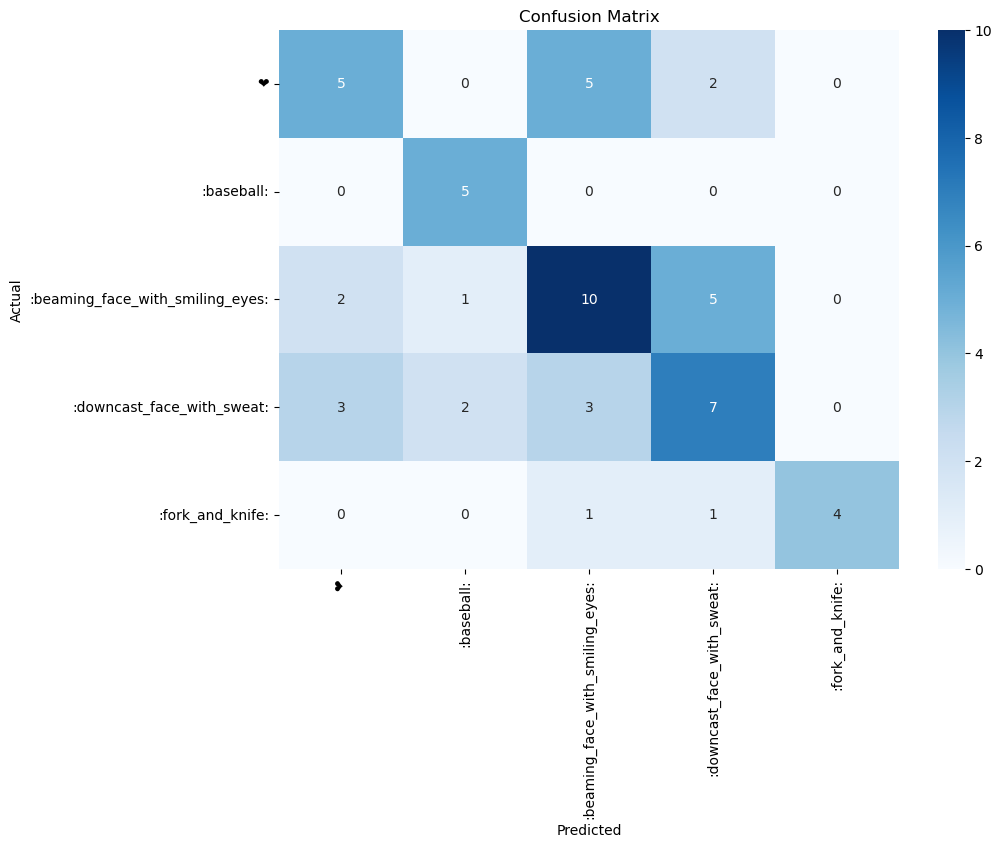

In [ ]:
import numpy as np
import pandas as pd
import emoji as emoji
from keras.utils import to_categorical
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.models import Sequential, model_from_json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
train = pd.read_csv('train_emoji.csv', header=None)
test = pd.read_csv('test_emoji (1).csv', header=None)

emoji_dictionary = {
    "0": "\u2764\uFE0F",    # :heart:
    "1": ":baseball:",
    "2": ":beaming_face_with_smiling_eyes:",
    "3": ":downcast_face_with_sweat:",
    "4": ":fork_and_knife:",
}

# Print emojis
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

data = train.values
for i in range(10):
    print(data[i][0], emoji.emojize(emoji_dictionary[str(data[i][1])]))

XT = train[0]
Xt = test[0]

YT = to_categorical(train[1])
Yt = to_categorical(test[1])

print(XT.shape)
print(Xt.shape)
print(YT.shape)
print(Yt.shape)

# Load GloVe embeddings
embeddings = {}
with open('glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embeddings[word] = coeffs

def getOutputEmbeddings(X):
    embedding_matrix_output = np.zeros((X.shape[0], 10, 50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings.get(X[ix][jx].lower(), np.zeros((50,)))
    return embedding_matrix_output

emb_XT = getOutputEmbeddings(XT)
emb_Xt = getOutputEmbeddings(Xt)
print(emb_XT.shape)
print(emb_Xt.shape)

# Build and train the model
model = Sequential()
model.add(LSTM(64, input_shape=(10, 50), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64, input_shape=(10, 50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(emb_XT, YT, batch_size=32, epochs=40, shuffle=True, validation_split=0.1)
model.evaluate(emb_Xt, Yt)

# Save the model
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("model.weights.h5")

# Generate predictions for the test set
pred = np.argmax(model.predict(emb_Xt), axis=1)
true = np.argmax(Yt, axis=1)

# Confusion matrix
cm = confusion_matrix(true, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(emoji_dictionary.values()), yticklabels=list(emoji_dictionary.values()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()